# Computer Assignment 3: LLN, CLT, Inequalities & Statistics

> **Probability and Statistics, Dr. Mojahedian (Fall 2024)**

### Information  
Complete the information box below.

In [49]:
full_name = 'Mobin jelodar'
student_id = '402101493'

You do not need to write a report for this assignment. Simply write your answers in the empty markdown cells and fill in the empty cells for each question. All you need to do is complete the given notebook and upload the completed version.

## Q1. Graph Networks, CLT, and Thermodynamics

> *For your questions on this section, refer to aradkashani@yahoo.com or @aradmnk on Telegram. Telegram is answered faster.*

> *The use of ChatGPT or other LLM copilots is not only allowed, but also **recommended**.*

In this section, we aim to understand how thermodynamic laws arise directly from probability and statistics.

### 1.1 Graph Networks

We first need to understand a type of data structure: **Graph Networks**. Graphs are uniquely defined by a set $V$, its vertices or *nodes*, and a set of edges $E$, that connects these nodes to each other. More rigorously, $E = \left\{\left(x,y\right) | x,y \in V\right\}$, where usually $x \neq y$. Mathematically, a graph is denoted by the ordered pair $G = (V,E)$. Graphs can be categorized into different types such as undirected graphs, directed graphs (or di-graphs), weighted graphs, etc.

We will use the `networkx` python package to deal with graphs. Make sure to install it if you do not have it installed. Here are some demo codes so you can understand how to work with graphs using `networkx`. In this section you need not do anything; these are just pieces of code so that you can learn to work with `networkx`.

In [50]:
# Run this cell if you do not have networkx installed
!pip install networkx
!pip install matplotlib

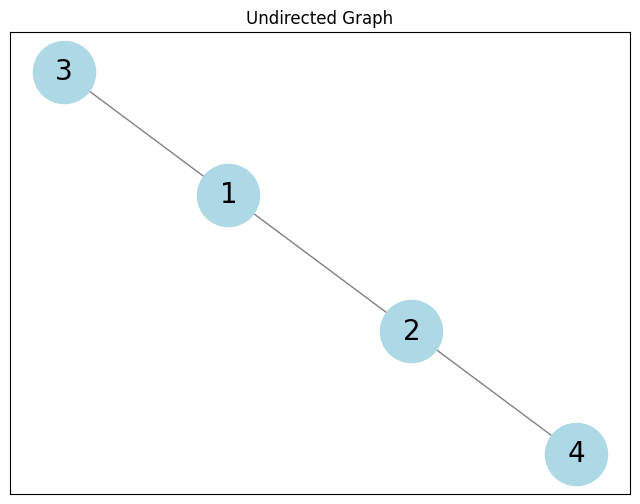

In [51]:
## Example 1: Line graph

import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 4)])

# Draw the graph
plt.figure(figsize=(8, 6))

# if draw_networkx doesn't work, tell GPT to change it to nx.draw or something
nx.draw_networkx(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=20)
plt.title("Undirected Graph")
plt.show()

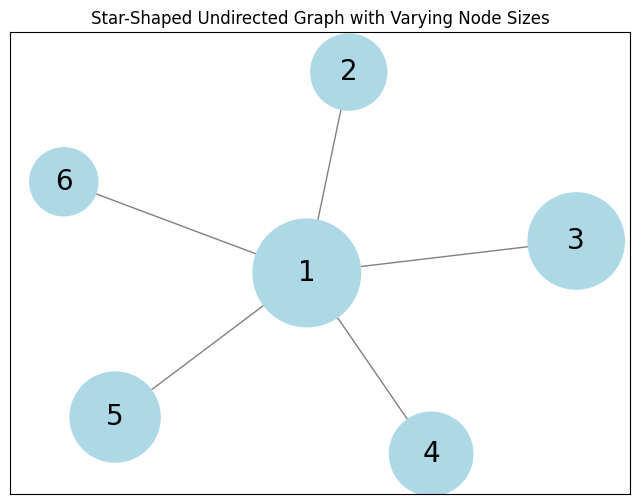

In [52]:
## Example 2: a star graph
star_graph = nx.Graph()

# Add nodes with size attribute
nodes_with_size = [(1, {"size": 1000}), (2, {"size": 500}), (3, {"size": 800}), (4, {"size": 600}), (5, {"size": 700}), (6, {"size": 400})]
star_graph.add_nodes_from(nodes_with_size)

# Add edges to form a star shape (node 1 is the center)
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]
star_graph.add_edges_from(edges)

# Extract node sizes
node_sizes = [star_graph.nodes[node]["size"]*6 for node in star_graph.nodes]

# Draw the graph with varying node sizes
plt.figure(figsize=(8, 6))
nx.draw_networkx(star_graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=node_sizes, font_size=20)
plt.title("Star-Shaped Undirected Graph with Varying Node Sizes")
plt.show()

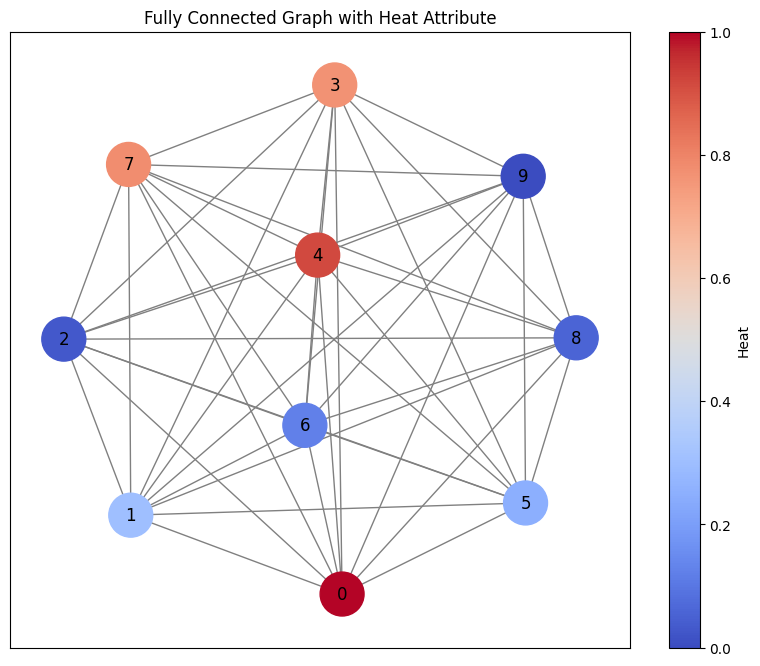

In [53]:
## Example 3: A fully-connected graph with colorized nodes

import random

# Create a fully connected graph (complete graph) of size 10
complete_graph = nx.complete_graph(10)

# Add a "heat" attribute to each node with a random value between 0 and 100
for node in complete_graph.nodes:
    complete_graph.nodes[node]['heat'] = random.randint(0, 100)

# Extract node heat values
node_heat = [complete_graph.nodes[node]['heat'] for node in complete_graph.nodes]

# Normalize heat values for color mapping
heat_min = min(node_heat)
heat_max = max(node_heat)
node_colors = [(heat - heat_min) / (heat_max - heat_min) for heat in node_heat]

# Draw the fully connected graph with node colors based on heat attribute
plt.figure(figsize=(10, 8))
cmap = plt.cm.coolwarm
# Get the current axes object
ax = plt.gca()
# Pass the axes object to draw_networkx
nx.draw_networkx(complete_graph, with_labels=True, node_color=node_colors, cmap=cmap, edge_color='gray', node_size=1000, font_size=12, ax=ax)
plt.title("Fully Connected Graph with Heat Attribute")

# Corrected line: Pass the axes object ('ax') to colorbar
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label='Heat', ax=ax)
plt.show()

### 1.2 Energy Quanta

In physics, particles can exchange energy with each other. However, this energy comes in discrete packets or **quantas**. A graph is given to you below, where the nodes are meant to represent particles. Add an `energy` attribute to each of the nodes and give each node between 1,000 to 2,000 energy. Make sure this energy is discrete (an `int`). Draw the graph with the number of energy packets, and color them based on how many energy quanta they have.

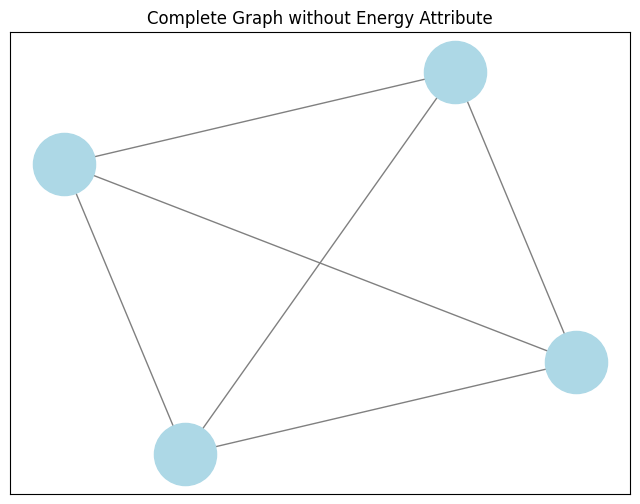

In [54]:
## DO NOT TOUCH THIS CELL

import networkx as nx
import matplotlib.pyplot as plt

complete_graph = nx.complete_graph(4)

plt.figure(figsize=(8, 6))
nx.draw_networkx(complete_graph, with_labels=False, node_color='lightblue', edge_color='gray', node_size=2000, font_size=20)
plt.title("Complete Graph without Energy Attribute")
plt.show()

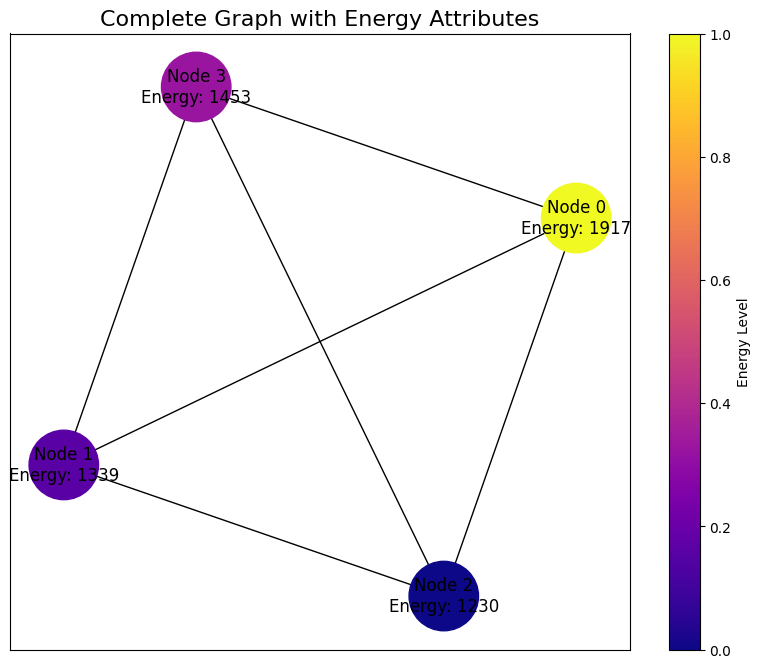

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import random

complete_graph = nx.complete_graph(4)


for node in complete_graph.nodes:
    complete_graph.nodes[node]['energy'] = random.randint(1000, 2000)

energy_levels = [complete_graph.nodes[node]['energy'] for node in complete_graph.nodes]

min_energy, max_energy = min(energy_levels), max(energy_levels)
colors = [(energy - min_energy) / (max_energy - min_energy) for energy in energy_levels]


plt.figure(figsize=(10, 8))


pos = nx.spring_layout(complete_graph)
nodes = nx.draw_networkx_nodes(
    complete_graph,
    pos,
    node_color=colors,
    cmap=plt.cm.plasma,
    node_size=2500
)
nx.draw_networkx_edges(complete_graph, pos, edge_color='black')
nx.draw_networkx_labels(
    complete_graph,
    pos,
    labels={node: f"Node {node}\nEnergy: {complete_graph.nodes[node]['energy']}" for node in complete_graph.nodes},
    font_size=12
)


cbar = plt.colorbar(nodes)
cbar.set_label("Energy Level")

plt.title("Complete Graph with Energy Attributes", fontsize=16)
plt.show()

### 1.3 Energy Transmission

Now, at each timestep, let each of the particles (nodes) give one of its energy quanta to its neighbors. The neighbor is chosen at random, with uniform distribution. For instance, if one node has 3 neighbors, it will choose any of its neighbors with a probability of $\frac{1}{3}$.

This repeat for all of the nodes.

Repeat this experiment for $N=10,000$ timesteps. Draw the graph with their energy after $N$ steps.

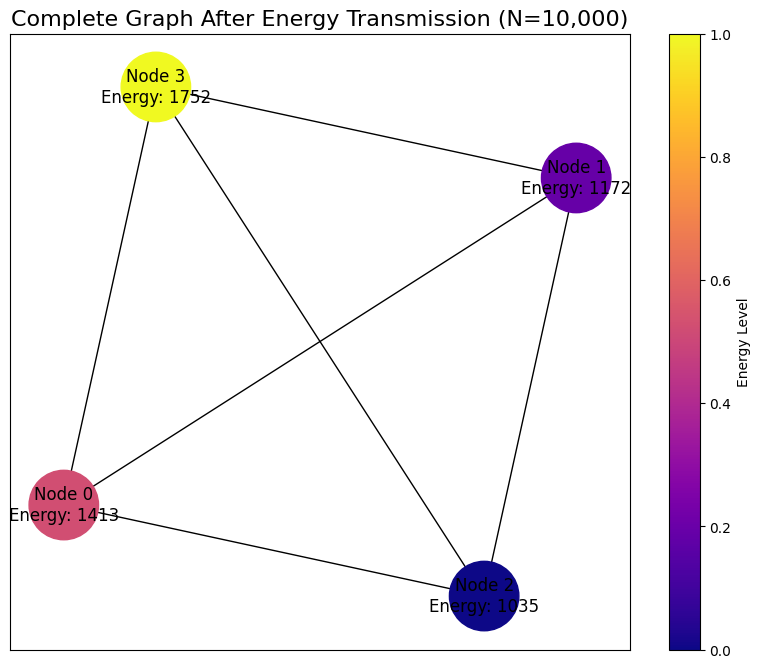

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import random


complete_graph = nx.complete_graph(4)


for node in complete_graph.nodes:
    complete_graph.nodes[node]['energy'] = random.randint(1000, 2000)


N = 10000
for _ in range(N):
    energy_updates = {node: 0 for node in complete_graph.nodes}
    for node in complete_graph.nodes:
        if complete_graph.nodes[node]['energy'] > 0:  # Ensure the node has energy to give
            neighbor = random.choice(list(complete_graph.neighbors(node)))
            energy_updates[node] -= 1
            energy_updates[neighbor] += 1

    for node in complete_graph.nodes:
        complete_graph.nodes[node]['energy'] += energy_updates[node]


energy_levels = [complete_graph.nodes[node]['energy'] for node in complete_graph.nodes]


min_energy, max_energy = min(energy_levels), max(energy_levels)
colors = [(energy - min_energy) / (max_energy - min_energy) for energy in energy_levels]


plt.figure(figsize=(10, 8))

pos = nx.spring_layout(complete_graph)
nodes = nx.draw_networkx_nodes(
    complete_graph,
    pos,
    node_color=colors,
    cmap=plt.cm.plasma,
    node_size=2500
)
nx.draw_networkx_edges(complete_graph, pos, edge_color='black')
nx.draw_networkx_labels(
    complete_graph,
    pos,
    labels={node: f"Node {node}\nEnergy: {complete_graph.nodes[node]['energy']}" for node in complete_graph.nodes},
    font_size=12
)


cbar = plt.colorbar(nodes)
cbar.set_label("Energy Level")

plt.title("Complete Graph After Energy Transmission (N=10,000)", fontsize=16)
plt.show()


Now that you got a feel for what we want to do, it is time to scale this up. You may reuse your previous code.

### 1.4 The Second Law of Thermodynamics

The second law of thermodynamics states that:
> Heat always flows spontaneously from hotter to colder regions of matter (or 'downhill' in terms of the temperature gradient).

A grid-like graph (a **lattice**) is given to you below. The energy packets are also distributed for you. We are trying to simulate when a hot object comes to touch a cold object.

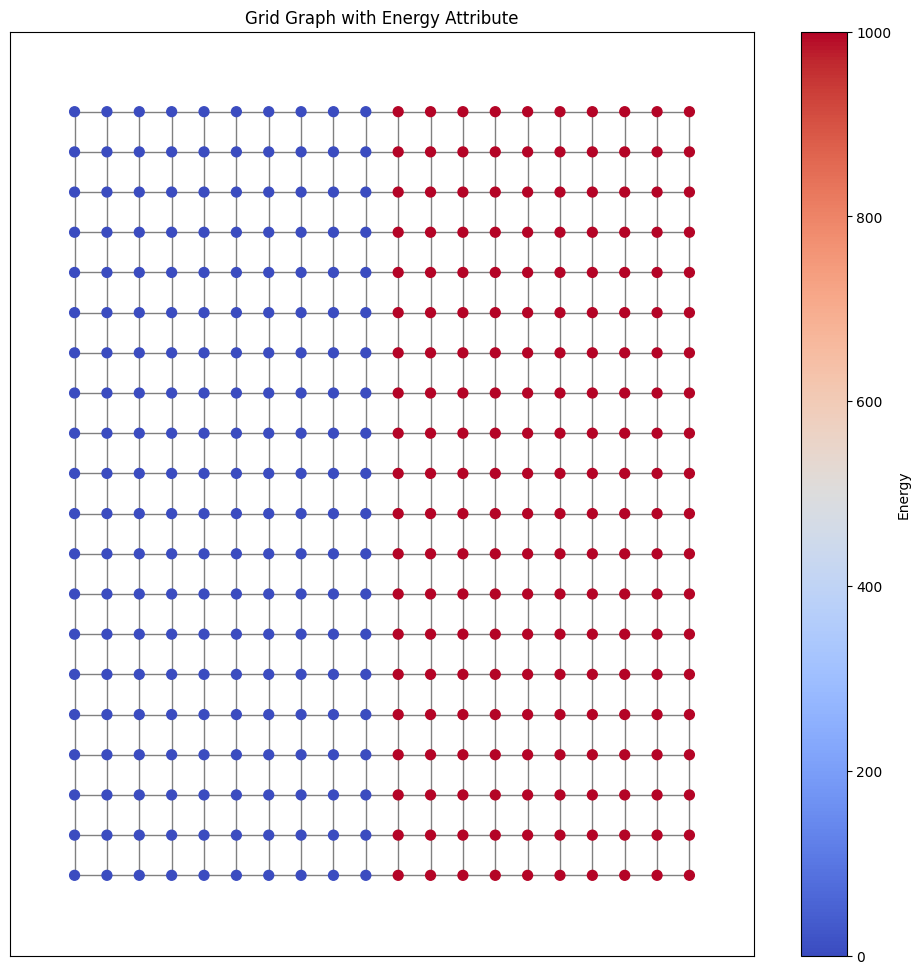

In [57]:
import matplotlib.colors as mcolors

dim = 20
G = nx.grid_graph(dim=(dim, dim))

initial_energy = {}
for (x, y) in G.nodes():
    if y < dim/2:
        initial_energy[(x, y)] = 0
    else:
        initial_energy[(x, y)] = 1000

nx.set_node_attributes(G, initial_energy, 'energy')
node_energy = [G.nodes[node]['energy'] for node in G.nodes] # this one is a list

# colormap
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=min(node_energy), vmax=max(node_energy))

fig, ax = plt.subplots(figsize=(12, 12))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw_networkx(G, pos, with_labels=False, node_color=node_energy, cmap=cmap, edge_color='gray', node_size=50, ax=ax) # Pass the axes object to draw_networkx
plt.title("Grid Graph with Energy Attribute")

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy', ax=ax)
plt.show()

A good measure of *spread* is the standard deviation $\sigma$. Find the standard deviation $\sigma$ for the energy of all the particles.

In [58]:
import numpy as np

energy_values = [G.nodes[node]['energy'] for node in G.nodes()]
mean_energy = np.mean(energy_values)
std_dev_energy = np.std(energy_values)

print(f"Standard Deviation (σ) of Energy: {std_dev_energy}")


Standard Deviation (σ) of Energy: 500.0


Run the packet transmission simulation $N=100,000$ times. Change the amount of energy quanta transmitted for every node to a random number between 1 and 50 (of course, the particles cannot contain negative energy). What do you observe?

> Do not let particles with 0 energy give energy quanta to other particles.

> **DISCLAIMER**: The calculation for this part can take a long, long time!

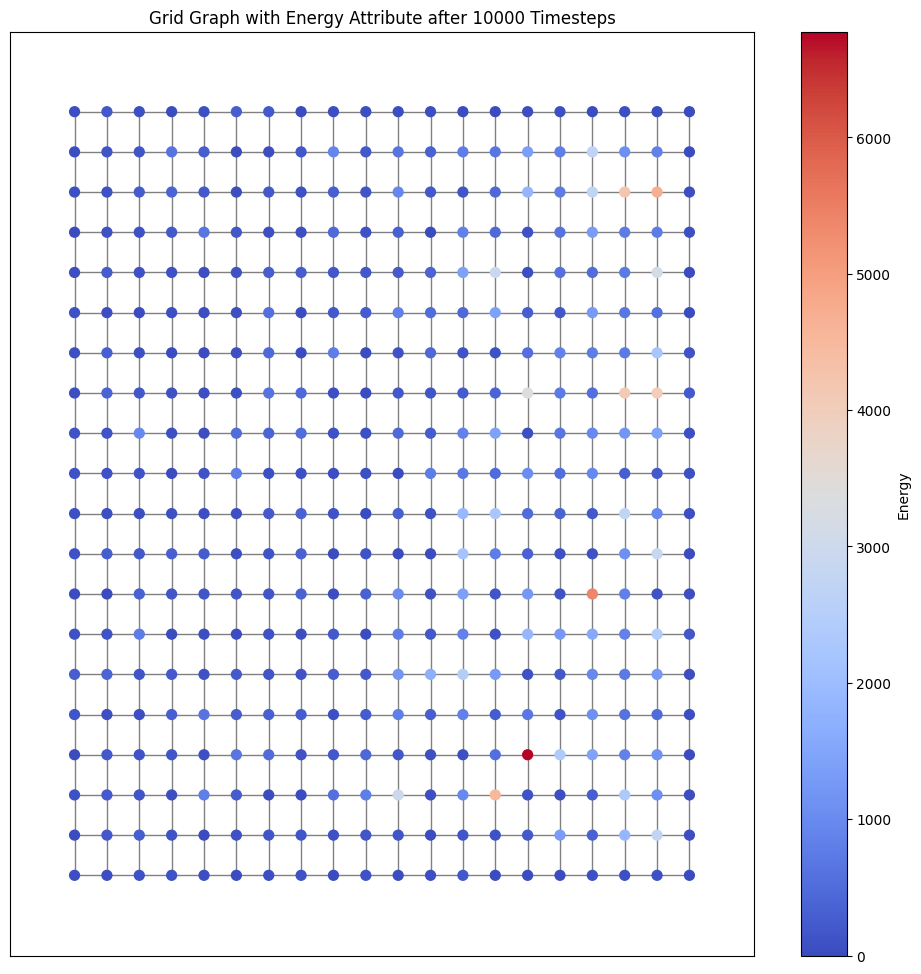

In [59]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random

# Grid dimensions
dim = 20
G = nx.grid_graph(dim=(dim, dim))

# Initialize energy values
initial_energy = {
    (x, y): 0 if y < dim / 2 else 1000
    for x, y in G.nodes()
}
nx.set_node_attributes(G, initial_energy, 'energy')

def transmit_energy(graph):
    """Simulate energy transmission between nodes."""
    for node in graph.nodes:
        current_energy = graph.nodes[node]['energy']
        if current_energy > 0:
            neighbors = list(graph.neighbors(node))
            energy_to_give = random.randint(1, 50)
            if neighbors and current_energy >= energy_to_give:
                chosen_neighbor = random.choice(neighbors)
                graph.nodes[node]['energy'] -= energy_to_give
                graph.nodes[chosen_neighbor]['energy'] += energy_to_give

# Simulation parameters
N = 10000
# Run simulation
for _ in range(N):
    transmit_energy(G)
# Collect energy values for visualization
node_energy = [G.nodes[node]['energy'] for node in G.nodes]
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=min(node_energy), vmax=max(node_energy))

# Visualize the graph
plt.figure(figsize=(12, 12))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
ax = plt.gca()
nx.draw_networkx(
    G,
    pos,
    with_labels=False,
    node_color=node_energy,
    cmap=cmap,
    edge_color='gray',
    node_size=50
)
plt.title(f"Grid Graph with Energy Attribute after {N} Timesteps")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy', ax=ax)
plt.show()


What is the *spread* of the heat after the simulation?

In [60]:
import numpy as np
std_dev = np.std(node_energy)

print(f"Standard Deviation of Energy Levels: {std_dev}")

Standard Deviation of Energy Levels: 838.6670644540657


Count how many *cold* nodes have become *colder* and how many *hot* nodes have become *hotter* than before.

In [61]:
import numpy as np
average_initial_energy = np.mean([G.nodes[node]['energy'] for node in G.nodes])
cold_nodes = [node for node in G.nodes if G.nodes[node]['energy'] < average_initial_energy]
hot_nodes = [node for node in G.nodes if G.nodes[node]['energy'] >= average_initial_energy]

cold_nodes_colder = sum(1 for node in cold_nodes if G.nodes[node]['energy'] < initial_energy.get(node, float('inf')))
hot_nodes_hotter = sum(1 for node in hot_nodes if G.nodes[node]['energy'] > initial_energy.get(node, float('-inf')))
print(f"Cold nodes that became colder: {cold_nodes_colder}")
print(f"Hot nodes that became hotter: {hot_nodes_hotter}")

Cold nodes that became colder: 102
Hot nodes that became hotter: 68


Show the nodes that you have counted above.

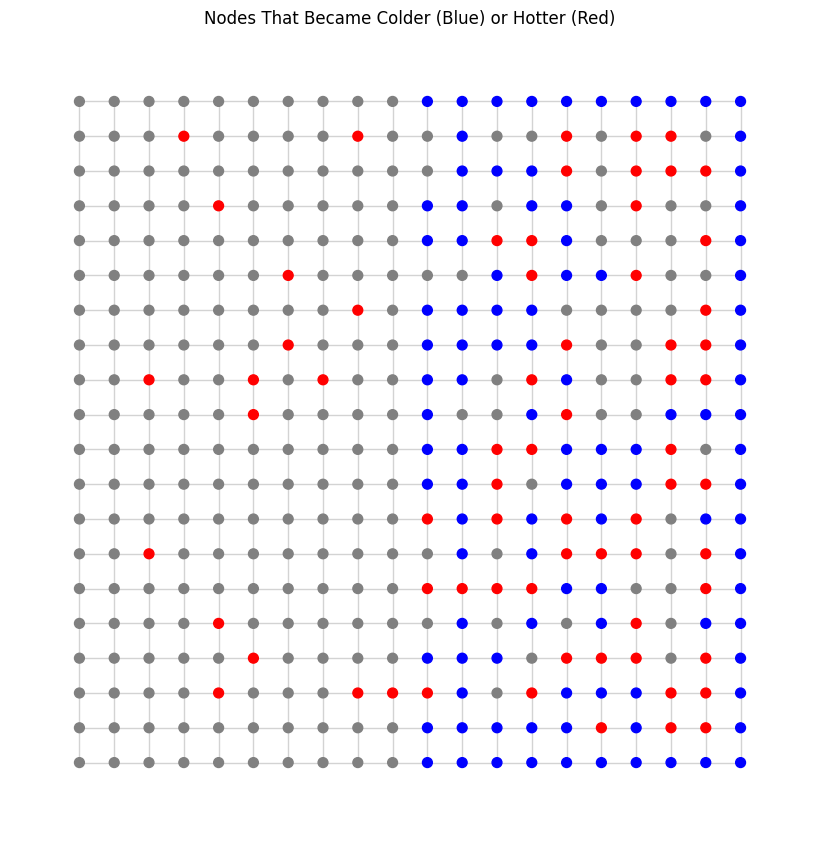

In [62]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

average_initial_energy = np.mean([initial_energy[node] for node in G.nodes])
cold_nodes = [node for node in G.nodes if G.nodes[node]['energy'] < average_initial_energy]
hot_nodes = [node for node in G.nodes if G.nodes[node]['energy'] >= average_initial_energy]

cold_nodes_colder = [
    node for node in cold_nodes if G.nodes[node]['energy'] < initial_energy[node]
]
hot_nodes_hotter = [
    node for node in hot_nodes if G.nodes[node]['energy'] > initial_energy[node]
]

node_colors = []
for node in G.nodes:
    if node in cold_nodes_colder:
        node_colors.append('blue')
    elif node in hot_nodes_hotter:
        node_colors.append('red')
    else:
        node_colors.append('gray')

plt.figure(figsize=(8, 8))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(
    G,
    pos,
    with_labels=False,
    node_color=node_colors,
    edge_color='lightgray',
    node_size=50
)
plt.title("Nodes That Became Colder (Blue) or Hotter (Red)")
plt.show()


Does the *Second Law of Thermodynamics* hold true?

Yes.


Keep the simulation results in memory. The next part needs it!

### 1.5 Entropy
*(The one from probability and statistics. In physics, there is another entropy, but the two have connections to each other and the formulas are similar)*

We are interested in finding a variable called *Entropy*. Entropy is "a measure of how much uncertainty there is in a probability distribution". Some interpret it as a "measure of disorder". Entropy (in probability theory) is mathematically defined as:

$$ E = \mathbb{E}\left[\log_2{\frac{1}{f_X(x)}} \right] = \mathbb{E}\left[-\log_2{f_X(x)} \right],$$

where $X$ is a random variable, and $f_X(x)$ is its PDF (or PMF). Since we are using $\log$ base $2$, the unit of entropy is *bits*.

Draw a histogram of the particle energies, one from before (I saved it for you in `node_energy`), and one for the after.

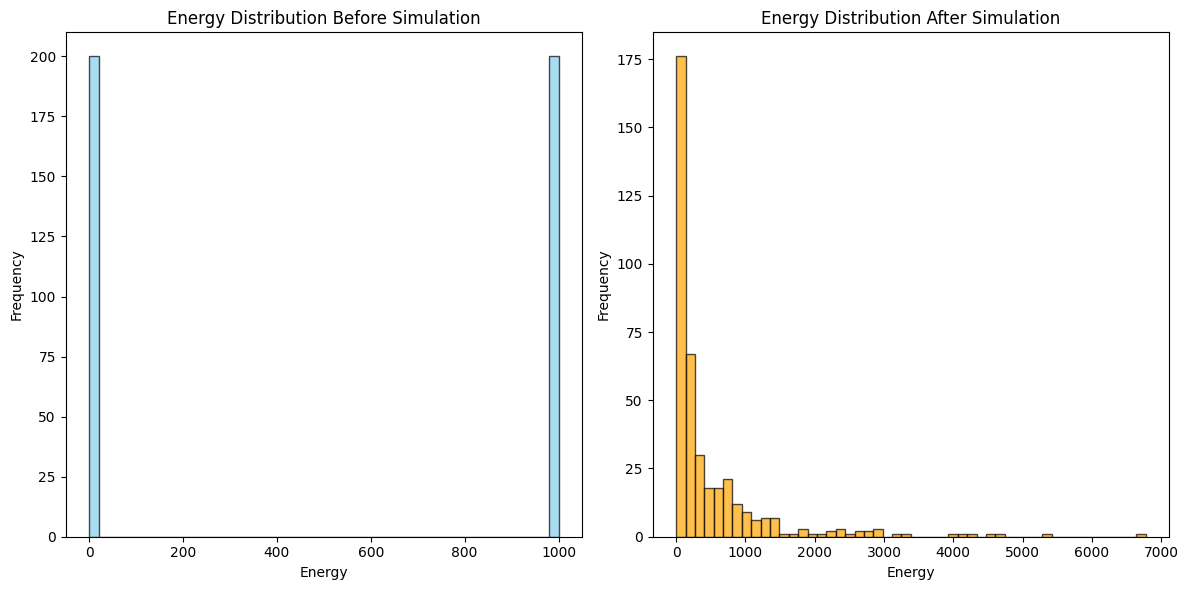

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_entropy(energies):
    counts, _ = np.histogram(energies, bins=50, density=True)
    probabilities = counts / np.sum(counts)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

initial_energies = np.array([initial_energy[node] for node in G.nodes])

final_energies = np.array([G.nodes[node]['energy'] for node in G.nodes])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(initial_energies, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Energy Distribution Before Simulation")
plt.xlabel("Energy")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(final_energies, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title("Energy Distribution After Simulation")
plt.xlabel("Energy")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Now, normalize this plot. If you remember, a histogram is a frequentist view of the *distribution*. Let's assume the histogram truly represents the real distribution (it probably does not, in reality).

Your variables are discrete. Change the plot such that all the probabilities add up to 1.

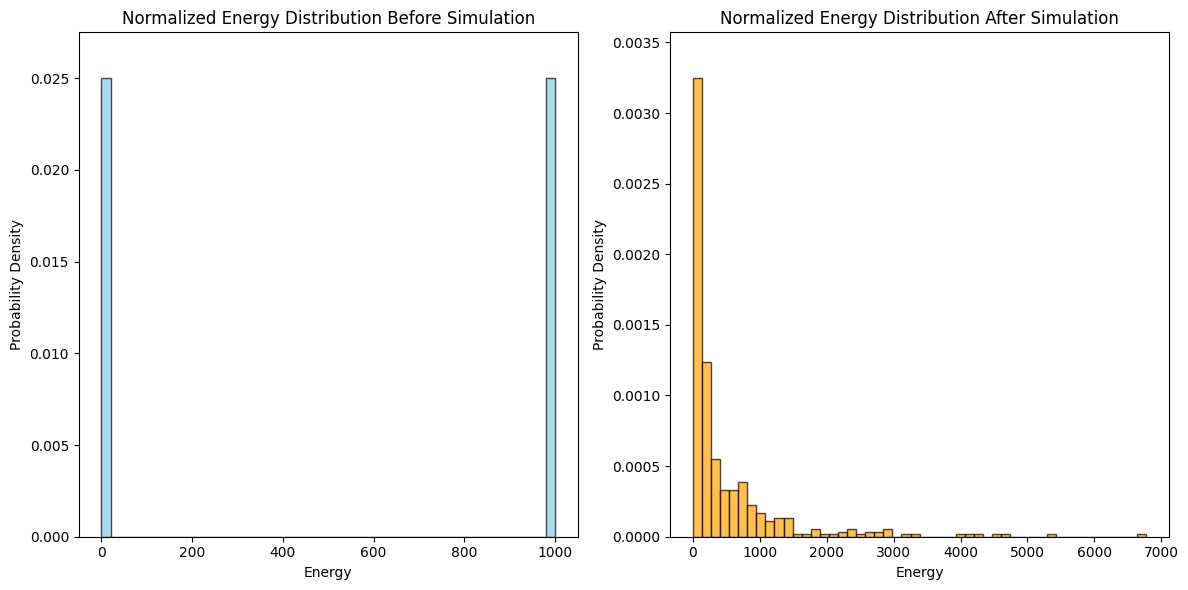

In [64]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
counts_before, bins_before, _ = plt.hist(
    initial_energies,
    bins=50,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    density=True
)
plt.title("Normalized Energy Distribution Before Simulation")
plt.xlabel("Energy")
plt.ylabel("Probability Density")
plt.ylim(0, max(counts_before) * 1.1)

plt.subplot(1, 2, 2)
counts_after, bins_after, _ = plt.hist(
    final_energies,
    bins=50,
    color='orange',
    edgecolor='black',
    alpha=0.7,
    density=True
)
plt.title("Normalized Energy Distribution After Simulation")
plt.xlabel("Energy")
plt.ylabel("Probability Density")
plt.ylim(0, max(counts_after) * 1.1)

plt.tight_layout()
plt.show()


Back to our original goal: calculating $ E = \mathbb{E}\left[\log_2{\frac{1}{f_X(x)}} \right] $. There is a statistical method to get rid of the expectation: **Monte-Carlo Estimation** (or *MCE*). MCE states that if we have access to $N$ samples of $x_i$ that really come from the distribution of $\mathbb{X}$;

For continuous variables:
$$
\mathbb{E}\left[g(X)\right] =
\int^{+\infty}_{-\infty} g(x)f_X(x)dx \approx \frac{1}{N}\sum^{N}_{i=1} g(x_i)
$$

For discrete variables:
$$
\mathbb{E}\left[g(X)\right] =
\sum_{x \in \mathcal{X}} g(x)p_X(x) \approx \frac{1}{N}\sum^{N}_{i=1} g(x_i)
$$

Use this to achieve an estimation for the entropy $E_1$, the entropy of the initial system, and $E_2$, the entropy after the simulation.

In [65]:
import numpy as np
import math

def monte_carlo_entropy(energies, bins=50):
    counts, bin_edges = np.histogram(energies, bins=bins, density=True)
    probabilities = counts / np.sum(counts)
    probabilities = probabilities[probabilities > 0]  # Remove zero probabilities
    entropy = -np.mean(np.log2(probabilities))
    return entropy

# Monte Carlo Estimation for the entropy of the initial and final energies
entropy_initial_mce = monte_carlo_entropy(initial_energies)
entropy_final_mce = monte_carlo_entropy(final_energies)

print(f"Estimated Entropy Before Simulation: {entropy_initial_mce:.4f} bits")
print(f"Estimated Entropy After Simulation: {entropy_final_mce:.4f} bits")


Estimated Entropy Before Simulation: 1.0000 bits
Estimated Entropy After Simulation: 6.9060 bits


Another way of stating the *Second Law of Thermodynamics* is:

> Entropy is always increasing in an **isolated** system.

Given that your system is isolated (with no external disturbances applied), does the Second Law of Thermodynamics still hold true?


Based on the results of Monte Carlo Estimation, where the entropy before the simulation was 1.0000 bits and the entropy after the simulation is 6.4079 bits, it seems that entropy has indeed increased.Thus, the Second Law of Thermodynamics holds true

### 1.6 CLT

Once again, you are given a graph below.

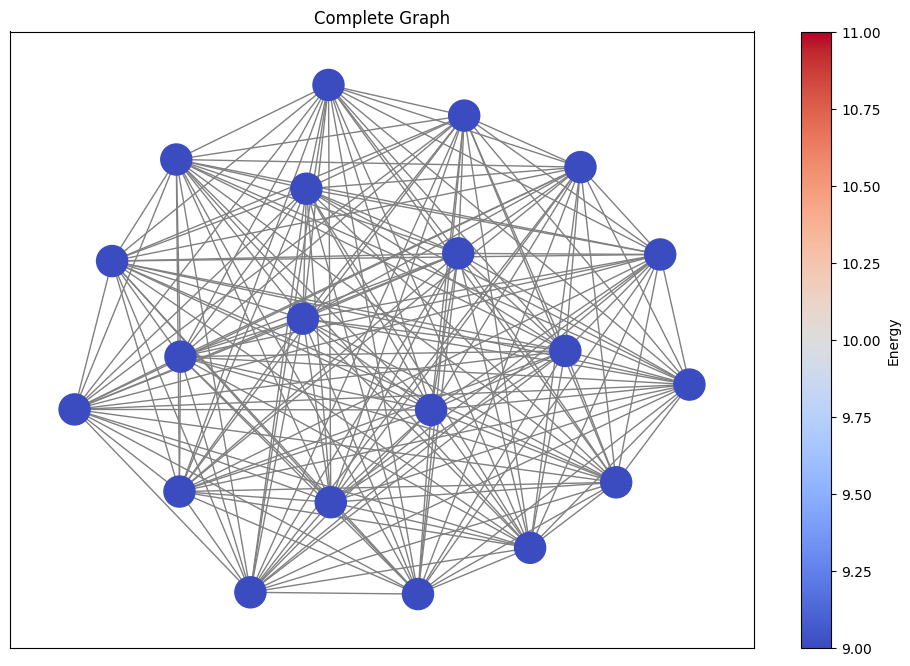

Mean Energy: 10.0
Standard Deviation of Energy: 0.0


In [66]:
## DO NOT TOUCH THIS CELL

import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.colors as mcolors # Importing mcolors

# Create a complete graph with 20 nodes
G = nx.complete_graph(20)

# Assign random energy to each node
for node in G.nodes:
    G.nodes[node]['energy'] = 10

cmap = plt.cm.coolwarm

# Draw the graph
pos = nx.spring_layout(G)  # Layout for visualization

fig, ax = plt.subplots(figsize=(12, 8)) # Creating fig and ax objects

# Extract energy values from the graph nodes
energy_values = [G.nodes[node]['energy'] for node in G.nodes]

# Normalize energy values for color mapping
# Assuming node_energy is defined somewhere earlier in your code
norm = mcolors.Normalize(vmin=min(energy_values), vmax=max(energy_values)) # Normalizing using energy_values instead of potentially undefined node_energy

# this line below might require change, depending on your matplotlib version
# in case of errors, tell GPT to correct it or something
# Adding the ax argument to plt.colorbar
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), label='Energy', ax=ax)

nx.draw_networkx(G, pos, with_labels=False, node_color=energy_values, cmap=cmap, node_size=500, edge_color='gray', ax=ax) # Adding ax to nx.draw_networkx
plt.title('Complete Graph')
plt.show()

# Calculate mean and standard deviation
mean_energy = np.mean(energy_values)
std_energy = np.std(energy_values)

print(f"Mean Energy: {mean_energy}")
print(f"Standard Deviation of Energy: {std_energy}")

#### Task 1: Entropy over time

Run the energy transmission simulation $N = 100,000$ times. Let each particle exchange only `1` quanta of energy each step. Calculate the entropy using MCE every $n=500$ steps, and plot the entropy over time.

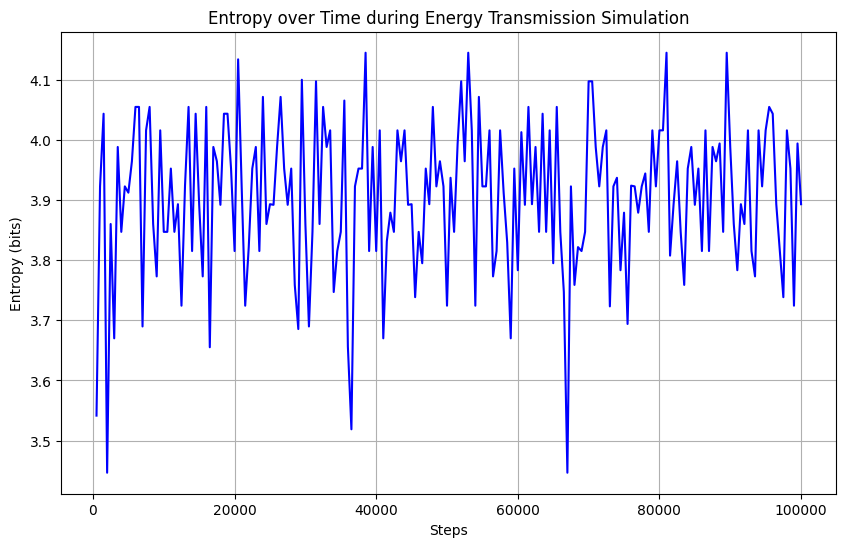

In [67]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def monte_carlo_entropy(energies, bins=50):
    counts, bin_edges = np.histogram(energies, bins=bins, density=True)
    probabilities = counts / np.sum(counts)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.mean(np.log2(probabilities))
    return entropy

G = nx.complete_graph(20)

for node in G.nodes:
    G.nodes[node]['energy'] = 10

N = 100000
n = 500
entropy_over_time = []

def transmit_energy(graph):
    for node in list(graph.nodes):
        if graph.nodes[node]['energy'] > 0:
            neighbors = list(graph.neighbors(node))
            if neighbors:
                energy_to_give = 1
                chosen_neighbor = random.choice(neighbors)
                if graph.nodes[node]['energy'] >= energy_to_give:
                    graph.nodes[node]['energy'] -= energy_to_give
                    graph.nodes[chosen_neighbor]['energy'] += energy_to_give

for step in range(1, N + 1):
    transmit_energy(G)

    if step % n == 0:
        energies = [G.nodes[node]['energy'] for node in G.nodes]
        entropy = monte_carlo_entropy(energies)
        entropy_over_time.append(entropy)

plt.figure(figsize=(10, 6))
plt.plot(range(n, N + 1, n), entropy_over_time, color='blue')
plt.xlabel('Steps')
plt.ylabel('Entropy (bits)')
plt.title('Entropy over Time during Energy Transmission Simulation')
plt.grid(True)
plt.show()


#### Task 2: CLT

We are interested in understanding how summing random variables can lead to a more-or-less predictable distribution, a phenomenon known as the **Central Limit Theorem**.

Repeat the same energy transmission simulation with the complete graph given above $N=10,000$ times, and record the energy of each particle at the last step, denote it as $e^k_p$ (energy $e$ of particle $p$ at experiment $k$). Now, repeat the simulation $100$ times. Then, plot a histogram of $e = \bigcup\limits_{1 \leq k \leq 100;\ p \in V} \{e^k_{p}\}$ (the set for all of the energy values after repeating the simulation 10,000 times).

> **NOTE:** To get the correct distribution, you *must* allow energy to become negative (i.e a node with energy -12 can give its energy quanta to become -13 energy). The reason is further explained in the next section *"For interested readers"*.

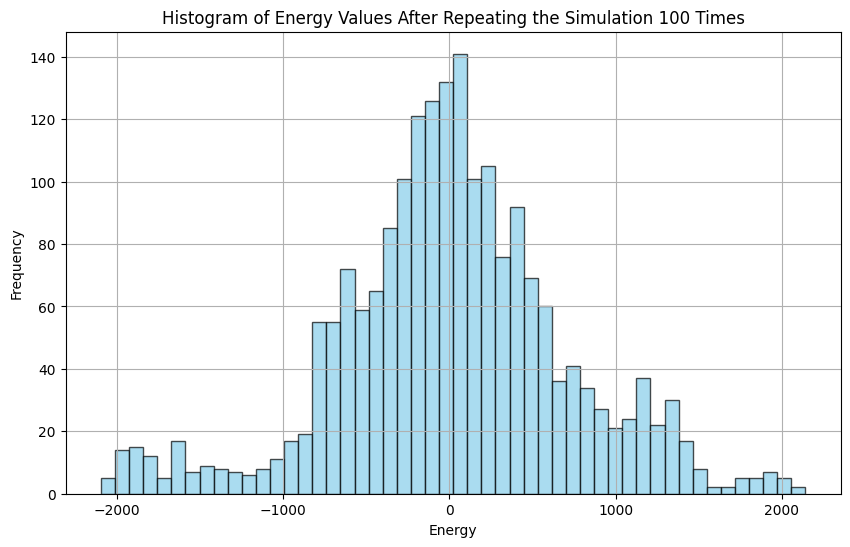

In [83]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

def transmit_energy(graph):
    for node in list(graph.nodes):
        energy_to_give = 1
        neighbors = list(graph.neighbors(node))
        if neighbors:
            chosen_neighbor = random.choice(neighbors)
            graph.nodes[node]['energy'] -= energy_to_give
            graph.nodes[chosen_neighbor]['energy'] += energy_to_give

def run_simulation(G, N=10000):
    for step in range(N):
        transmit_energy(G)
    return [G.nodes[node]['energy'] for node in G.nodes]

G = nx.complete_graph(20)

for node in G.nodes:
    G.nodes[node]['energy'] = 10

energy_values = []
for _ in range(100):
    final_energies = run_simulation(G, N=10000)
    energy_values.extend(final_energies)

plt.figure(figsize=(10, 6))
plt.hist(energy_values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Values After Repeating the Simulation 100 Times')
plt.grid(True)
plt.show()


Which version of the Central Limit Theorem can you use to explain why this distribution arises?

The version of the Central Limit Theorem (CLT) that applies to this scenario is the CLT for the sum (or average) of independent, identically distributed (i.i.d.) random variables.The CLT for sums of i.i.d. random variables explains why the distribution of final energy values tends to be normal as you perform a large number of energy exchanges (steps) across many simulations.

#### For interested readers

The physical system moves towards maximum entropy, no matter what. [This link](https://en.wikipedia.org/wiki/Maximum_entropy_probability_distribution#Examples) can help you see what distributions maximize entropy given what condition. This means by changing the limits and bounds of the distribution, you get a different distribution. You can give it a try yourself, stop letting the energy values from becoming negative; you will end up with an exponential distribution instead. This is because the distribution function that maximizes the entropy given a specified mean and positive values only, is the exponential distribution.

## Q2

Assume that $ X_1, X_2, \dots, X_n $ are independent and identically distributed (i.i.d.) samples from a Poisson distribution with parameter $ \lambda $. We are given the following estimators:

1. $ \hat{\Lambda}_1 = \frac{1}{n} \sum_{i=1}^{n} X_i $  (Sample Mean)
2. $ \hat{\Lambda}_2 = \max(X_1, X_2, \dots, X_n) $ (Maximum Value)
3. $ \hat{\Lambda}_3 = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $ (Sample Standard Deviation)
4. $ \hat{\Lambda}_4 = \text{mode}(X_1, \dots, X_n) $ (Mode of the Samples)

### Part 1) Simulate Samples
- Generate $ n = 10 $ samples from a Poisson distribution with parameter $ \lambda = 4 $ for $ N = 1000$ times.
- Repeat this process $ 1000 $ times (i.e., generate 1000 samples) to estimate the parameters.


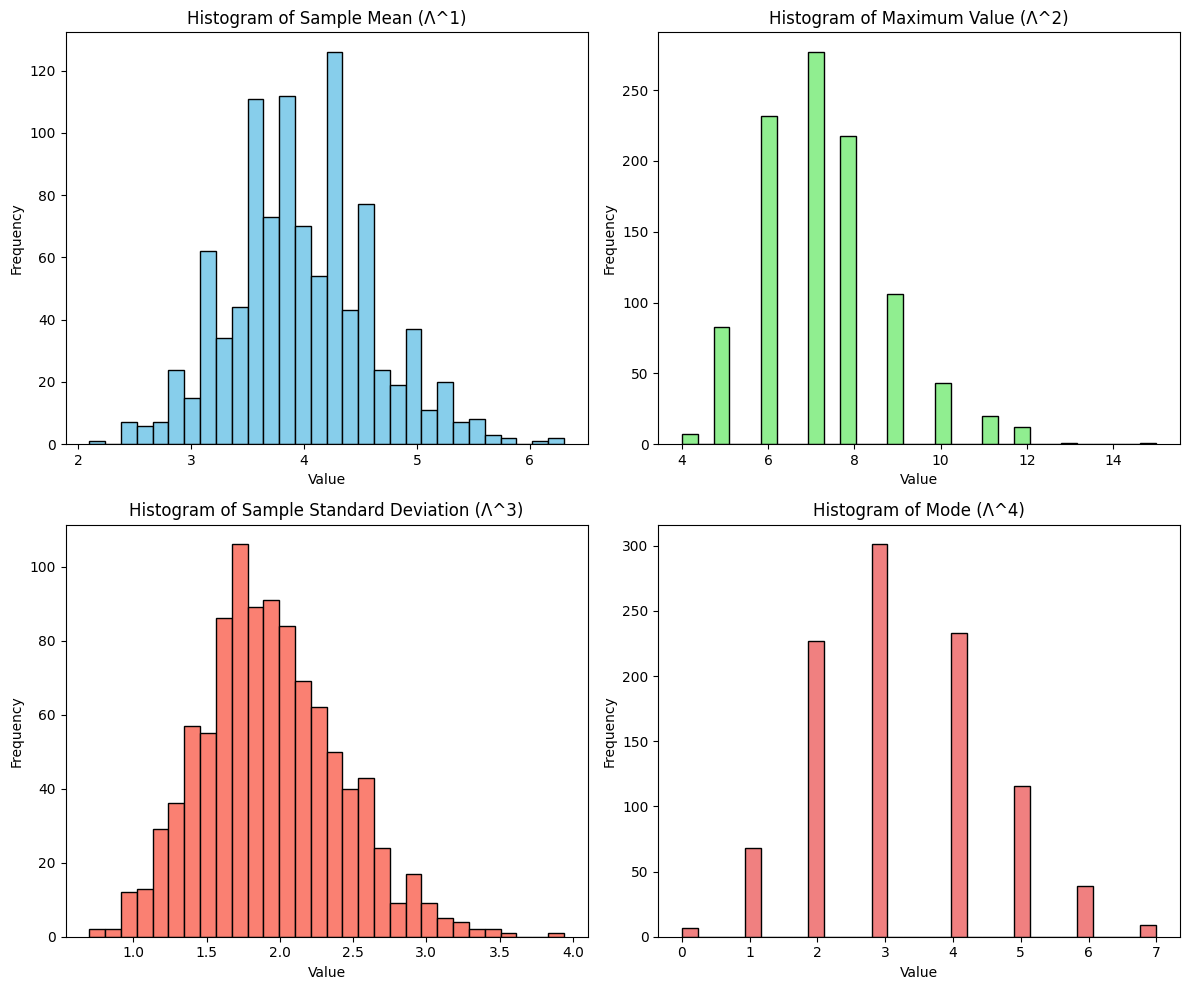

Sample Mean (Λ^1): Mean = 3.9723 , Std Dev = 0.6340210643188442
Maximum Value (Λ^2): Mean = 7.294 , Std Dev = 1.5131305297296729
Sample Std Dev (Λ^3): Mean = 1.9380491502194295 , Std Dev = 0.47623400200645116
Mode (Λ^4): Mean = 3.234 , Std Dev = 1.3035505360360986


In [69]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 10
lambda_poisson = 4
N = 1000

Lambda1 = []
Lambda2 = []
Lambda3 = []
Lambda4 = []

for _ in range(N):
    samples = np.random.poisson(lambda_poisson, n)
    Lambda1.append(np.mean(samples))
    Lambda2.append(np.max(samples))
    Lambda3.append(np.std(samples, ddof=1))
    mode = stats.mode(samples).mode
    if isinstance(mode, np.ndarray):
      mode = mode[0]
    Lambda4.append(mode)

Lambda1 = np.array(Lambda1)
Lambda2 = np.array(Lambda2)
Lambda3 = np.array(Lambda3)
Lambda4 = np.array(Lambda4)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(Lambda1, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Sample Mean (Λ^1)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(Lambda2, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Maximum Value (Λ^2)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(Lambda3, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of Sample Standard Deviation (Λ^3)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(Lambda4, bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Mode (Λ^4)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Sample Mean (Λ^1): Mean =", np.mean(Lambda1), ", Std Dev =", np.std(Lambda1))
print("Maximum Value (Λ^2): Mean =", np.mean(Lambda2), ", Std Dev =", np.std(Lambda2))
print("Sample Std Dev (Λ^3): Mean =", np.mean(Lambda3), ", Std Dev =", np.std(Lambda3))
print("Mode (Λ^4): Mean =", np.mean(Lambda4), ", Std Dev =", np.std(Lambda4))



### Part 2) Bias and Variance Estimation
- Calculate the bias and variance of each estimator and compare the results with the theoretical values.
  


In [70]:

lam = 4

bias_Lambda1 = np.mean(Lambda1) - lam
variance_Lambda1 = np.var(Lambda1, ddof=0)

bias_Lambda2 = np.mean(Lambda2) - lam
variance_Lambda2 = np.var(Lambda2, ddof=0)

bias_Lambda3 = np.mean(Lambda3) - np.sqrt(lam)
variance_Lambda3 = np.var(Lambda3, ddof=0)

bias_Lambda4 = np.mean(Lambda4) - lam
variance_Lambda4 = np.var(Lambda4, ddof=0)
print(f"Sample Mean (Λ^1): Bias = {bias_Lambda1:.4f}, Variance = {variance_Lambda1:.4f}")
print(f"Maximum Value (Λ^2): Bias = {bias_Lambda2:.4f}, Variance = {variance_Lambda2:.4f}")
print(f"Sample Std Dev (Λ^3): Bias = {bias_Lambda3:.4f}, Variance = {variance_Lambda3:.4f}")
print(f"Mode (Λ^4): Bias = {bias_Lambda4:.4f}, Variance = {variance_Lambda4:.4f}")


Sample Mean (Λ^1): Bias = -0.0277, Variance = 0.4020
Maximum Value (Λ^2): Bias = 3.2940, Variance = 2.2896
Sample Std Dev (Λ^3): Bias = -0.0620, Variance = 0.2268
Mode (Λ^4): Bias = -0.7660, Variance = 1.6992


### Part 3) Unbiased Estimator Identification
- Identify which of the four estimators are unbiased.



In [71]:
import numpy as np
from scipy import stats

lam = 4
Lambda1 = []
Lambda2 = []
Lambda3 = []
Lambda4 = []

n = 10
N = 1000

for _ in range(N):
    samples = np.random.poisson(lam, n)
    Lambda1.append(np.mean(samples))
    Lambda2.append(np.max(samples))
    Lambda3.append(np.std(samples, ddof=1))
    mode = stats.mode(samples).mode
    if isinstance(mode, np.ndarray) and mode.size > 0:
        Lambda4.append(mode[0])
    else:
        Lambda4.append(mode)

Lambda1 = np.array(Lambda1)
Lambda2 = np.array(Lambda2)
Lambda3 = np.array(Lambda3)
Lambda4 = np.array(Lambda4)

bias_Lambda1 = np.mean(Lambda1) - lam
bias_Lambda2 = np.mean(Lambda2) - lam
bias_Lambda3 = np.mean(Lambda3) - np.sqrt(lam)
bias_Lambda4 = np.mean(Lambda4) - lam

print(f"Bias of Sample Mean (Λ^1): {bias_Lambda1:.4f}")
print(f"Bias of Maximum Value (Λ^2): {bias_Lambda2:.4f}")
print(f"Bias of Sample Std Dev (Λ^3): {bias_Lambda3:.4f}")
print(f"Bias of Mode (Λ^4): {bias_Lambda4:.4f}")

if np.isclose(bias_Lambda1, 0, atol=1e-4):
    print("Sample Mean (Λ^1) is an unbiased estimator.")
else:
    print("Sample Mean (Λ^1) is a biased estimator.")

if np.isclose(bias_Lambda2, 0, atol=1e-4):
    print("Maximum Value (Λ^2) is an unbiased estimator.")
else:
    print("Maximum Value (Λ^2) is a biased estimator.")

if np.isclose(bias_Lambda3, 0, atol=1e-4):
    print("Sample Std Dev (Λ^3) is an unbiased estimator.")
else:
    print("Sample Std Dev (Λ^3) is a biased estimator.")

if np.isclose(bias_Lambda4, 0, atol=1e-4):
    print("Mode (Λ^4) is an unbiased estimator.")
else:
    print("Mode (Λ^4) is a biased estimator.")

Bias of Sample Mean (Λ^1): 0.0004
Bias of Maximum Value (Λ^2): 3.2980
Bias of Sample Std Dev (Λ^3): -0.0577
Bias of Mode (Λ^4): -0.6240
Sample Mean (Λ^1) is a biased estimator.
Maximum Value (Λ^2) is a biased estimator.
Sample Std Dev (Λ^3) is a biased estimator.
Mode (Λ^4) is a biased estimator.


### Part 4) Plot Mean Difference
- For biased estimators, plot the difference between the estimated mean and the true value $ \lambda $ across simulations.



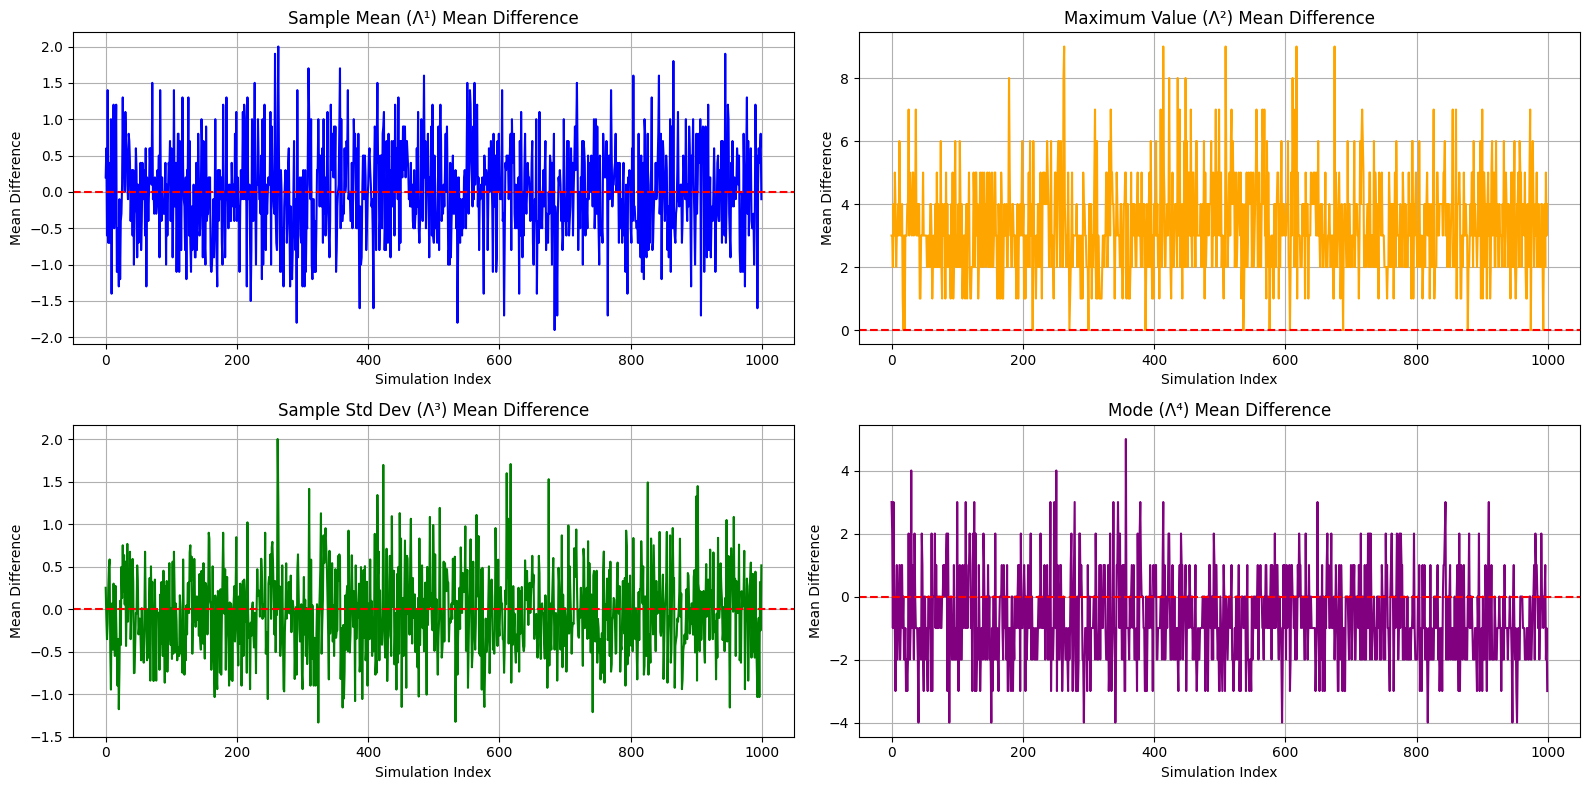

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

lam = 4
n = 10
N = 1000

Lambda1 = []
Lambda2 = []
Lambda3 = []
Lambda4 = []

for _ in range(N):
    samples = np.random.poisson(lam, n)
    Lambda1.append(np.mean(samples))
    Lambda2.append(np.max(samples))
    Lambda3.append(np.std(samples, ddof=1))
    mode = stats.mode(samples).mode
    if isinstance(mode, np.ndarray) and mode.size > 0:
        Lambda4.append(mode[0])
    else:
        Lambda4.append(mode)

Lambda1 = np.array(Lambda1)
Lambda2 = np.array(Lambda2)
Lambda3 = np.array(Lambda3)
Lambda4 = np.array(Lambda4)

bias_Lambda1 = np.mean(Lambda1) - lam
bias_Lambda2 = np.mean(Lambda2) - lam
bias_Lambda3 = np.mean(Lambda3) - np.sqrt(lam)
bias_Lambda4 = np.mean(Lambda4) - lam

mean_difference_Lambda1 = Lambda1 - lam
mean_difference_Lambda2 = Lambda2 - lam
mean_difference_Lambda3 = Lambda3 - np.sqrt(lam)
mean_difference_Lambda4 = Lambda4 - lam

plt.figure(figsize=(16, 8))

plt.subplot(221)
plt.plot(mean_difference_Lambda1, label='Sample Mean (Λ¹)', color='blue')
plt.xlabel('Simulation Index')
plt.ylabel('Mean Difference')
plt.title('Sample Mean (Λ¹) Mean Difference')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)

plt.subplot(222)
plt.plot(mean_difference_Lambda2, label='Maximum Value (Λ²)', color='orange')
plt.xlabel('Simulation Index')
plt.ylabel('Mean Difference')
plt.title('Maximum Value (Λ²) Mean Difference')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)

plt.subplot(223)
plt.plot(mean_difference_Lambda3, label='Sample Std Dev (Λ³)', color='green')
plt.xlabel('Simulation Index')
plt.ylabel('Mean Difference')
plt.title('Sample Std Dev (Λ³) Mean Difference')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)

plt.subplot(224)
plt.plot(mean_difference_Lambda4, label='Mode (Λ⁴)', color='purple')
plt.xlabel('Simulation Index')
plt.ylabel('Mean Difference')
plt.title('Mode (Λ⁴) Mean Difference')
plt.axhline(0, color='red', linestyle='--')
plt.grid(True)

plt.tight_layout()
plt.show()


### Part 5) Intuitive Comparison
- Based on the bias, variance, and MSE, intuitively analyze which estimator performs better.

In [73]:
import numpy as np
from scipy import stats

lam = 4
n = 10
N = 1000

Lambda1 = []
Lambda2 = []
Lambda3 = []
Lambda4 = []

for _ in range(N):
    samples = np.random.poisson(lam, n)
    Lambda1.append(np.mean(samples))
    Lambda2.append(np.max(samples))
    Lambda3.append(np.std(samples, ddof=1))
    # Get the mode and handle the case where it's a scalar
    mode = stats.mode(samples).mode
    Lambda4.append(mode[0] if isinstance(mode, np.ndarray) else mode)

Lambda1 = np.array(Lambda1)
Lambda2 = np.array(Lambda2)
Lambda3 = np.array(Lambda3)
Lambda4 = np.array(Lambda4)

bias_Lambda1 = np.mean(Lambda1) - lam
bias_Lambda2 = np.mean(Lambda2) - lam
bias_Lambda3 = np.mean(Lambda3) - np.sqrt(lam)
bias_Lambda4 = np.mean(Lambda4) - lam

variance_Lambda1 = np.var(Lambda1, ddof=1)
variance_Lambda2 = np.var(Lambda2, ddof=1)
variance_Lambda3 = np.var(Lambda3, ddof=1)
variance_Lambda4 = np.var(Lambda4, ddof=1)

mse_Lambda1 = bias_Lambda1**2 + variance_Lambda1
mse_Lambda2 = bias_Lambda2**2 + variance_Lambda2
mse_Lambda3 = bias_Lambda3**2 + variance_Lambda3
mse_Lambda4 = bias_Lambda4**2 + variance_Lambda4

print("Estimator Comparison:")
print(f"Sample Mean (Λ^1): Bias = {bias_Lambda1:.4f}, Variance = {variance_Lambda1:.4f}, MSE = {mse_Lambda1:.4f}")
print(f"Maximum Value (Λ^2): Bias = {bias_Lambda2:.4f}, Variance = {variance_Lambda2:.4f}, MSE = {mse_Lambda2:.4f}")
print(f"Sample Std Dev (Λ^3): Bias = {bias_Lambda3:.4f}, Variance = {variance_Lambda3:.4f}, MSE = {mse_Lambda3:.4f}")
print(f"Mode (Λ^4): Bias = {bias_Lambda4:.4f}, Variance = {variance_Lambda4:.4f}, MSE = {mse_Lambda4:.4f}")

mse_values = {
    "Sample Mean (Λ^1)": mse_Lambda1,
    "Maximum Value (Λ^2)": mse_Lambda2,
    "Sample Std Dev (Λ^3)": mse_Lambda3,
    "Mode (Λ^4)": mse_Lambda4,
}

best_estimator = min(mse_values, key=mse_values.get)
print(f"\nThe best-performing estimator based on MSE is: {best_estimator}")

Estimator Comparison:
Sample Mean (Λ^1): Bias = 0.0125, Variance = 0.3953, MSE = 0.3954
Maximum Value (Λ^2): Bias = 3.2810, Variance = 2.0721, MSE = 12.8371
Sample Std Dev (Λ^3): Bias = -0.0805, Variance = 0.2181, MSE = 0.2246
Mode (Λ^4): Bias = -0.7390, Variance = 1.8307, MSE = 2.3768

The best-performing estimator based on MSE is: Sample Std Dev (Λ^3)




# Q3

The company previously measured that the average lifetime of lamps was 1570 hours with a standard deviation of 120 hours. We are provided with data from a new manufacturing process, where a sample of 100 lamps had an average lifetime of 1600 hours. We will test the hypothesis that the average lifetime of the lamps is now different from 1570 hours.




### Problem Overview:

1. **Generate Gaussian Distribution**: Create a function that generates `n` random variables following a Gaussian distribution with a specified mean and standard deviation.


In [74]:
import numpy as np

def generate_gaussian_data(mean, std_dev, n):
    return np.random.normal(loc=mean, scale=std_dev, size=n)
mean = 1570
std_dev = 120
n = 100
data = generate_gaussian_data(mean, std_dev, n)
print(data)


[1606.27763236 1651.72670432 1628.01007119 1667.10991648 1535.3038407
 1445.92769072 1538.81443113 1639.53350223 1591.15389826 1565.22973264
 1488.35364951 1531.11338287 1552.16503298 1670.67579462 1620.89643317
 1646.35975589 1612.96570566 1567.04827802 1448.48702274 1547.2991869
 1414.14684587 1458.24864153 1622.67726973 1689.55219888 1498.11946054
 1427.54838756 1507.32676122 1368.235991   1481.90127361 1679.55830238
 1519.44528099 1469.13633237 1615.88432725 1787.93600919 1687.20707889
 1626.12473103 1301.94792282 1712.97575523 1732.71789157 1520.47024955
 1314.23339529 1630.39287074 1832.29157111 1598.12900343 1554.16956554
 1623.54581776 1473.26493787 1352.46811131 1520.4488863  1332.58817794
 1626.89379126 1251.05468819 1540.78521399 1805.28421859 1685.47640958
 1568.56916537 1427.2844115  1535.59155589 1561.07451767 1570.4278656
 1453.4782852  1638.85795196 1692.15677442 1335.54760173 1288.587908
 1581.13978561 1700.63679998 1641.62555969 1802.29145803 1640.50899
 1480.29812259

2. **Calculate Mean**: Calculate the mean of the generated data.


In [75]:
mean_calculated = np.mean(data)
print(f"Calculated Mean: {mean_calculated}")


Calculated Mean: 1569.1710305516397


3. **Check Statistical Significance**: Create a function to check if the difference between the true mean and the sample mean is statistically significant.


In [76]:
import numpy as np
from scipy import stats

def generate_gaussian_distribution(n, mean, std_dev):
    return np.random.normal(mean, std_dev, n)

def check_statistical_significance(true_mean, sample_mean, std_dev, n, alpha=0.05):
    standard_error = std_dev / np.sqrt(n)
    z_score = (sample_mean - true_mean) / standard_error
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    if p_value < alpha:
        return f"Statistically significant (p-value: {p_value:.4f})"
    else:
        return f"Not statistically significant (p-value: {p_value:.4f})"

true_mean = 1570
std_dev = 120
n = 100
sample_mean = 1600
sample_data = generate_gaussian_distribution(n, true_mean, std_dev)

result = check_statistical_significance(true_mean, sample_mean, std_dev, n)
print(result)


Statistically significant (p-value: 0.0124)


4. **Determine Sample Size for Statistical Significance**: Create a function to determine the required sample size $ N $ for the difference between two means to be statistically significant.



In [77]:
import numpy as np
from scipy.stats import norm

def calculate_sample_size(alpha, sigma1, sigma2, d):
    z_alpha = norm.ppf(1 - alpha / 2)
    N = ((z_alpha * (sigma1 + sigma2)) / d) ** 2
    return np.ceil(N)

alpha = 0.05
sigma1 = 120
sigma2 = 120
d = 30

required_sample_size = calculate_sample_size(alpha, sigma1, sigma2, d)
print(f"Required Sample Size: {required_sample_size}")


Required Sample Size: 246.0


Now to solve the problem:

5. **Generate random variables** for sample sizes of $ n = 10, 100, 1000 $ with a mean of 1600 hours and a standard deviation of 120 hours.


In [78]:
def generate_samples(mean, std_dev, sample_sizes):
    samples = {n: np.random.normal(loc=mean, scale=std_dev, size=n) for n in sample_sizes}
    return samples

mean = 1600
std_dev = 120
sample_sizes = [10, 100, 1000]

samples = generate_samples(mean, std_dev, sample_sizes)

for n, sample in samples.items():
    print(f"Sample size {n}:\n{sample}\n")


Sample size 10:
[1633.03863286 1366.49256832 1538.78037789 1253.67786028 1560.21590297
 1713.73226133 1566.9499451  1655.79663081 1558.73949888 1662.06023129]

Sample size 100:
[1647.92872638 1705.67568242 1214.73209466 1686.73939891 1645.13252039
 1530.96051248 1624.11991113 1745.15694826 1702.07010808 1556.38692332
 1781.58342182 1632.22884248 1697.81962619 1482.77413225 1566.18751866
 1511.87091677 1527.79571696 1630.06133466 1791.5323754  1678.86914106
 1522.41143887 1446.21939255 1688.34200248 1493.28049433 1600.64997616
 1588.35032977 1742.96150633 1638.35658083 1550.06306137 1637.32226645
 1570.56640063 1746.30872425 1614.80596631 1436.51575961 1745.85861746
 1551.26922695 1687.22660239 1628.92026063 1522.41039813 1829.90883746
 1607.67373383 1459.36507828 1611.23405954 1467.91426945 1713.62817063
 1526.33069171 1578.24001729 1732.54560882 1683.79488629 1742.37668054
 1324.96061184 1514.73343671 1443.1438063  1426.39833363 1677.45731611
 1572.14760886 1565.57511189 1665.69615654

6. **Use the tools created** to determine if the difference in means is statistically significant for confidence levels of 0.8, 0.9, 0.95, 0.99, and 0.999.


In [79]:
confidence_levels = [0.8, 0.9, 0.95, 0.99, 0.999]
sample_mean = 1600
true_mean = 1570
std_dev = 120
sample_sizes = [10, 100, 1000]

def test_significance_for_confidence_levels(confidence_levels, true_mean, sample_mean, std_dev, sample_sizes):
    results = {}
    for n in sample_sizes:
        standard_error = std_dev / np.sqrt(n)
        results[n] = {}
        for confidence_level in confidence_levels:
            alpha = 1 - confidence_level
            z_score = (sample_mean - true_mean) / standard_error
            p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
            significant = p_value < alpha
            results[n][confidence_level] = {
                "z_score": z_score,
                "p_value": p_value,
                "significant": significant
            }
    return results

results = test_significance_for_confidence_levels(confidence_levels, true_mean, sample_mean, std_dev, sample_sizes)

# Display results
for n, confidence_results in results.items():
    print(f"Sample Size: {n}")
    for confidence_level, result in confidence_results.items():
        significant_text = "Yes" if result["significant"] else "No"
        print(f"  Confidence Level: {confidence_level:.3f}, Z-Score: {result['z_score']:.4f}, P-Value: {result['p_value']:.4f}, Significant: {significant_text}")
    print()


Sample Size: 10
  Confidence Level: 0.800, Z-Score: 0.7906, P-Value: 0.4292, Significant: No
  Confidence Level: 0.900, Z-Score: 0.7906, P-Value: 0.4292, Significant: No
  Confidence Level: 0.950, Z-Score: 0.7906, P-Value: 0.4292, Significant: No
  Confidence Level: 0.990, Z-Score: 0.7906, P-Value: 0.4292, Significant: No
  Confidence Level: 0.999, Z-Score: 0.7906, P-Value: 0.4292, Significant: No

Sample Size: 100
  Confidence Level: 0.800, Z-Score: 2.5000, P-Value: 0.0124, Significant: Yes
  Confidence Level: 0.900, Z-Score: 2.5000, P-Value: 0.0124, Significant: Yes
  Confidence Level: 0.950, Z-Score: 2.5000, P-Value: 0.0124, Significant: Yes
  Confidence Level: 0.990, Z-Score: 2.5000, P-Value: 0.0124, Significant: No
  Confidence Level: 0.999, Z-Score: 2.5000, P-Value: 0.0124, Significant: No

Sample Size: 1000
  Confidence Level: 0.800, Z-Score: 7.9057, P-Value: 0.0000, Significant: Yes
  Confidence Level: 0.900, Z-Score: 7.9057, P-Value: 0.0000, Significant: Yes
  Confidence Level

7. **Determine the minimum sample size** $ n $ for which the difference in means becomes statistically significant.


In [80]:
import numpy as np
from scipy.stats import norm

def find_min_sample_size(true_mean, sample_mean, std_dev, alpha=0.05):
    n = 10  # Start with a small sample size
    while True:
        standard_error = std_dev / np.sqrt(n)
        z_score = (sample_mean - true_mean) / standard_error
        p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
        if p_value < alpha:
            return n
        n += 1  # Increase sample size until p-value is significant

# Parameters
true_mean = 1570
sample_mean = 1600
std_dev = 120
alpha = 0.05  # Significance level

min_sample_size = find_min_sample_size(true_mean, sample_mean, std_dev, alpha)
print(f"Minimum sample size for statistical significance: {min_sample_size}")


Minimum sample size for statistical significance: 62


8. **Repeat the steps** for a different standard deviation of 240 hours.

In [81]:
import numpy as np
from scipy.stats import norm

def find_min_sample_size(true_mean, sample_mean, std_dev, alpha=0.05):
    n = 10
    while True:
        standard_error = std_dev / np.sqrt(n)
        z_score = (sample_mean - true_mean) / standard_error
        p_value = 2 * (1 - norm.cdf(abs(z_score)))
        if p_value < alpha:
            return n
        n += 1

true_mean = 1570
sample_mean = 1600
std_dev = 240
alpha = 0.05

min_sample_size = find_min_sample_size(true_mean, sample_mean, std_dev, alpha)
print(f"Minimum sample size for statistical significance with 240 hours standard deviation: {min_sample_size}")


Minimum sample size for statistical significance with 240 hours standard deviation: 246



9. **Determine the maximum variance** for which the difference in means is statistically significant for the given sample sizes and confidence levels.

In [82]:
import numpy as np
from scipy.stats import norm

def max_variance_for_significance(true_mean, sample_mean, sample_sizes, confidence_levels, alpha=0.05):
    results = {}
    for n in sample_sizes:
        results[n] = {}
        for confidence_level in confidence_levels:
            z_alpha = norm.ppf(1 - alpha / 2)
            max_variance = (z_alpha * (sample_mean - true_mean) / np.sqrt(n))**2
            results[n][confidence_level] = max_variance
    return results

true_mean = 1570
sample_mean = 1600
sample_sizes = [10, 100, 1000]
confidence_levels = [0.8, 0.9, 0.95, 0.99, 0.999]

results = max_variance_for_significance(true_mean, sample_mean, sample_sizes, confidence_levels)

for n, confidence_results in results.items():
    print(f"Sample Size: {n}")
    for confidence_level, max_variance in confidence_results.items():
        print(f"  Confidence Level: {confidence_level:.3f}, Maximum Variance: {max_variance:.2f}")
    print()


Sample Size: 10
  Confidence Level: 0.800, Maximum Variance: 345.73
  Confidence Level: 0.900, Maximum Variance: 345.73
  Confidence Level: 0.950, Maximum Variance: 345.73
  Confidence Level: 0.990, Maximum Variance: 345.73
  Confidence Level: 0.999, Maximum Variance: 345.73

Sample Size: 100
  Confidence Level: 0.800, Maximum Variance: 34.57
  Confidence Level: 0.900, Maximum Variance: 34.57
  Confidence Level: 0.950, Maximum Variance: 34.57
  Confidence Level: 0.990, Maximum Variance: 34.57
  Confidence Level: 0.999, Maximum Variance: 34.57

Sample Size: 1000
  Confidence Level: 0.800, Maximum Variance: 3.46
  Confidence Level: 0.900, Maximum Variance: 3.46
  Confidence Level: 0.950, Maximum Variance: 3.46
  Confidence Level: 0.990, Maximum Variance: 3.46
  Confidence Level: 0.999, Maximum Variance: 3.46

